# EDA

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


In [2]:
def scatter(df, x, y, size=None, color=None, hue=None, title="", xlabel="", ylabel="", caption="", alt_text=""):
    ax = sns.relplot(data=df, x=x, y=y, hue=hue, kind="scatter")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    print(f"Caption: {caption}\nAlt text: {alt_text}\n")

def lineplot(df, x, y, hue=None, title="", xlabel="", ylabel="", caption="",  alt_text=""):
    ax = sns.relplot(data=df, x=x, y=y, hue=hue, kind="line")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    print(f"Caption: {caption}\nAlt text: {alt_text}\n")

## World Development Indicators (WDI)

In [3]:
# Load the WDI data and remove the last 5 summary rows
wdi = pd.read_csv("wdi.csv", encoding="latin1")
wdi.drop(wdi.index[-5:], inplace=True)
wdi

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024],2023 [YR2023],2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,42647492,41454761,40578842,40000412,39068979,37856121,...,11017409,10756922,10505959,10266395,10036008,9814318,9604487,9404406,9214083,9035043
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,66.035,65.617,60.417,61.454,62.941,...,36.979,36.51,36.042,35.583,35.124,34.673,34.201,33.757,33.291,32.799
2,Afghanistan,AFG,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,..,64.467,63.941,57.052,58.455,59.91,...,36.287,35.825,35.324,34.877,34.438,34.004,33.543,33.098,32.626,32.136
3,Afghanistan,AFG,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,..,67.536,67.236,64.079,64.656,66.144,...,37.758,37.281,36.851,36.38,35.9,35.428,34.945,34.502,34.043,33.549
4,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,2.26694373649188,-6.24017199240269,-20.7388393676343,-2.35110067203466,3.91160341625552,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,73.3297162833404,72.9690157226638,71.2154841745704,72.1822239463873,72.8689103086688,...,57.6800785564019,57.3352975180805,56.9037526493978,56.4490075635883,55.926447643924,56.0966979719764,55.6522285444853,55.2860734026534,52.7972301278289,50.9418860745353
1592,World,WLD,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,..,70.9509824812085,70.5865297779335,68.8457227034894,69.6938651146375,70.5179407959146,...,55.5639101213891,55.2118576945869,54.7927806960897,54.361842574,53.7938826509021,54.0638521424664,53.6438578535896,53.2892385505192,50.8534751477021,49.0329289941033
1593,World,WLD,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,..,75.8433123202811,75.4914707227111,73.7443179940467,74.8456326084263,75.3489068020102,...,59.9676063746238,59.634048012983,59.1856128498586,58.7074375098789,58.2481172573786,58.2995430590897,57.833928221655,57.4591443871999,54.9207634428588,53.0299591998556
1594,World,WLD,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.86326302627853,2.94333273070461,3.35991138278709,6.41954127739832,-2.84908234670674,2.71004016031682,...,5.99121349188727,5.96513976675233,3.81510333514781,5.46585667174196,5.63011941423086,6.55870216905303,5.00217755853545,5.32924080938184,4.05120144521081,..


### Number of rows and columns 

In [4]:
wdi.shape

(1596, 69)

The above code shows that the dataset contains 1596 rows and 69 columns. Each row represents a single indicator for a specific country and every column aside from the first four represents the year from 1960 to 2024 and contains the value of the specifc indicator for that year.

### Missing Data


In [5]:
wdi = wdi.replace("..", pd.NA)
missing = wdi.isna().sum()
missing[missing > 0]

2024 [YR2024]    834
2023 [YR2023]     22
2022 [YR2022]     15
2021 [YR2021]     14
2020 [YR2020]     14
                ... 
1964 [YR1964]    127
1963 [YR1963]    127
1962 [YR1962]    124
1961 [YR1961]    131
1960 [YR1960]    279
Length: 65, dtype: int64

In [6]:
percent_missing = wdi.isna().sum().sum() / (wdi.shape[0] * wdi.shape[1]) * 100
print(f"Total missing data: {percent_missing:.2f}%")

Total missing data: 4.05%


In this uncleaned dataset, missing data is represented by "..". There are 65 rows with missing data and 4.05% of the total data is missing. 

Missing Data is extremely prevalent in the earlier years of data collection espcially in countries with relatively lower GDPs. Additionally, the year 2024 has a lot of missing data probably due to the fact that the dataset hasn't been updated with the 2024 values yet.

To work with the missing data, I plan to remove the 2024 data entirely and replace all of the ".." cells with NaN, which is better for computations.

In [7]:

id_cols = wdi.columns[:4].tolist()

wdi = wdi.melt(
    id_vars=id_cols,
    var_name="Year",
    value_name="Indicator Value"
)

wdi["Year"] = wdi["Year"].str.extract(r"(\d{4})") 
wdi["Year"] = pd.to_numeric(wdi["Year"], errors="coerce")

wdi["Indicator Value"] = wdi["Indicator Value"].replace("..", pd.NA)
wdi["Indicator Value"] = pd.to_numeric(wdi["Indicator Value"], errors="coerce")

wdi = wdi[wdi["Year"] != 2024]

wdi = wdi.dropna(subset=["Indicator Value"])

wdi = wdi.pivot_table(
    index=[id_cols[0], id_cols[1], "Year"],  # Country Name, Country Code, Year
    columns=id_cols[2],  # Series Name
    values="Indicator Value"
)

wdi

Series Name                     Age dependency ratio, old (% of working-age population)  \
Country Name Country Code Year                                                            
Afghanistan  AFG          1960                                           5.112019         
                          1961                                           5.092907         
                          1962                                           5.069176         
                          1963                                           5.046569         
                          1964                                           5.029460         
...                                                                           ...         
Zimbabwe     ZWE          2019                                           6.554177         
                          2020                                           6.604042         
                          2021                                           6.598137         
                          2022                                           6.586732         
                          2023                                           6.571795         

Series Name                     GDP growth (annual %)  \
Country Name Country Code Year                          
Afghanistan  AFG          1960                    NaN   
                          1961                    NaN   
                          1962                    NaN   
                          1963                    NaN   
                          1964                    NaN   
...                                               ...   
Zimbabwe     ZWE          2019              -6.332450   
                          2020              -7.816933   
                          2021               8.468039   
                          2022               6.139176   
                          2023               5.336770   

Series Name                     Life expectancy at birth, female (years)  \
Country Name Country Code Year                                             
Afghanistan  AFG          1960                                    33.549   
                          1961                                    34.043   
                          1962                                    34.502   
                          1963                                    34.945   
                          1964                                    35.428   
...                                                                  ...   
Zimbabwe     ZWE          2019                                    63.049   
                          2020                                    63.747   
                          2021                                    62.289   
                          2022                                    64.544   
                          2023                                    65.013   

Series Name                     Life expectancy at birth, male (years)  \
Country Name Country Code Year                                           
Afghanistan  AFG          1960                                  32.136   
                          1961                                  32.626   
                          1962                                  33.098   
                          1963                                  33.543   
                          1964                                  34.004   
...                                                                ...   
Zimbabwe     ZWE          2019                                  58.830   
                          2020                                  59.091   
                          2021                                  57.717   
                          2022                                  59.880   
                          2023                                  60.226   

Series Name                     Life expectancy at birth, total (years)  \
Country Name Country Code Year                 

### Variables of Interest

The World Bank, which manages the World Development Indicators dataset, has over 1600 indicators across 266 countries with data since the 1960s. Due to the fact that the amount of data is so large, they allow you to choose which indicators, countries, and years you want to focus on and create a CSV dataset with just the information you need. I was able to select only the indicators that were relevant to my research questions across all countries and years. Thus, all of my variables are variables of interest.

1) Population, total
* Represents the total population of a country in a given year
* Useful for all 3 research questions in order to weigh results by population to get accurate results

In [8]:
wdi["Population, total"].describe()

count    1.693000e+04
mean     2.164615e+08
std      7.082492e+08
min      2.715000e+03
25%      1.009540e+06
50%      6.731695e+06
75%      4.677977e+07
max      8.064977e+09
Name: Population, total, dtype: float64

2) Life expectancy at birth, total (years)
* Represents the life expectancy in a given year in a given country for all genders
* Useful for RQ1, "How does life expectancy correlate with sanitation?"

In [9]:
wdi["Life expectancy at birth, total (years)"].describe()

count    16926.000000
mean        64.735089
std         11.080180
min         10.989000
25%         57.661500
50%         67.091500
75%         72.914677
max         86.372000
Name: Life expectancy at birth, total (years), dtype: float64

3) Life expectancy at birth, male (years)	
* Represents the life expectancy in a given year in a given country for men
* Useful for RQ3, "Is there a connection between gender inequality index and life expectancy disparity between men and women?" to compute the life expectancy disparity between males and females

In [10]:
wdi["Life expectancy at birth, male (years)"].describe()

count    16926.000000
mean        62.292934
std         10.684209
min         10.128000
25%         55.634000
50%         64.320185
75%         69.979666
max         84.448000
Name: Life expectancy at birth, male (years), dtype: float64

4) Life expectancy at birth, female (years)	
* Represents the life expectancy in a given year in a given country for women
* Useful for RQ3, "Is there a connection between gender inequality index and life expectancy disparity between men and women?" to compute the life expectancy disparity between males and females

In [11]:
wdi["Life expectancy at birth, female (years)"].describe()

count    16926.000000
mean        67.315303
std         11.574074
min         11.274000
25%         59.797250
50%         69.888000
75%         76.129500
max         88.504000
Name: Life expectancy at birth, female (years), dtype: float64

5) GDP growth (annual %)
* Represents the annual percentage of growth of a country's GDP
* Useful for RQ2 "Are countries with rapidly aging populations experiencing slower economic growth?"

In [12]:
wdi["GDP growth (annual %)"].describe()

count    13882.000000
mean         3.682081
std          6.221632
min        -64.047107
25%          1.409164
50%          3.815640
75%          6.121946
max        149.972963
Name: GDP growth (annual %), dtype: float64

6) Age dependency ratio, old (% of working-age population)
* Represents the number of individuals aged 65 or older per 100 people of working age
* Useful for RQ2 "Are countries with rapidly aging populations experiencing slower economic growth?"

In [13]:
wdi["Age dependency ratio, old (% of working-age population)"].describe()

count    16930.000000
mean        10.641679
std          6.898877
min          1.011724
25%          6.007311
50%          7.774416
75%         13.751465
max         74.791927
Name: Age dependency ratio, old (% of working-age population), dtype: float64

### Plotting Variables

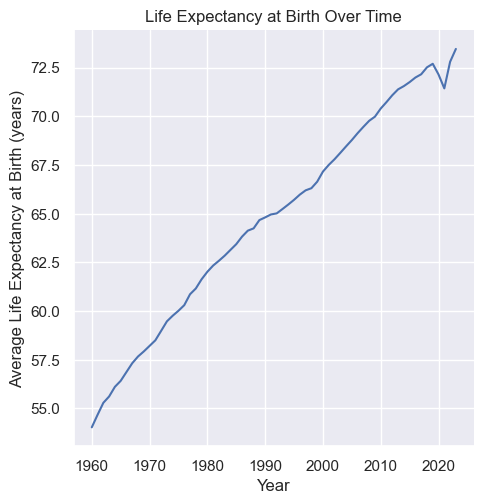

Caption: This scatter plot shows the trend of life expectancy at birth from various countries over the years.
Alt text: A scatter plot with Year on the x-axis and Life Expectancy at Birth on the y-axis, showing an upward trend over time.
2021 data point is lower than 2020.



In [14]:
avg_life_exp = wdi.groupby("Year")["Life expectancy at birth, total (years)"].mean().reset_index()

lineplot(avg_life_exp, x="Year", y="Life expectancy at birth, total (years)", hue=None,
        title="Life Expectancy at Birth Over Time",
        xlabel="Year",
        ylabel="Average Life Expectancy at Birth (years)",
        caption="This scatter plot shows the trend of life expectancy at birth from various countries over the years.",
        alt_text="A scatter plot with Year on the x-axis and Life Expectancy at Birth on the y-axis, showing an upward trend over time.\n2021 data point is lower than 2020."
)

The variables represented in the plot are the years on the x-axis and the average life expectancy at birth on the y-axis. I chose to plot this because I wanted to see how the average life expectancy has changed over time. Overall, the life expectancy is rising pretty linearly with respect to time. It's really interesting to see how 2021's average life expectancy is lower than 2020's, which I assume is most likely due to the COVID-19 Pandemic. This graph shows that on average people all across the world are living longer--a great thing to see!

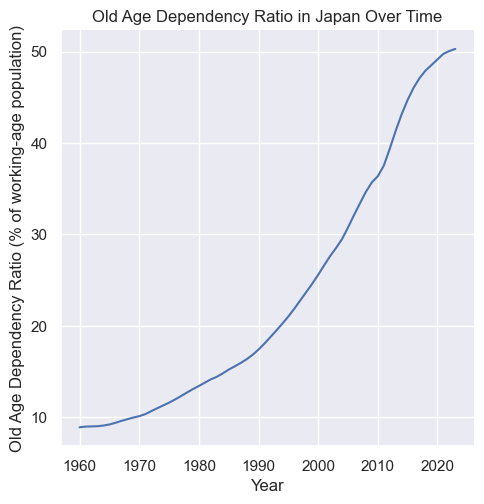

Caption: This line plot illustrates the trend of the old age dependency ratio in Japan over the years 1960 to 2023.
Alt text: A line plot with Year on the x-axis and Old Age Dependency Ratio on the y-axis, showing an increasing trend over time.



In [15]:
# old age dependency ratio in Japan over time
wdi.reset_index(inplace=True)
japan_old_age_dep = wdi[wdi["Country Name"] == "Japan"]
lineplot(japan_old_age_dep, x="Year", y="Age dependency ratio, old (% of working-age population)",
        title="Old Age Dependency Ratio in Japan Over Time",
        xlabel="Year",
        ylabel="Old Age Dependency Ratio (% of working-age population)",
        caption="This line plot illustrates the trend of the old age dependency ratio in Japan over the years 1960 to 2023.",
        alt_text="A line plot with Year on the x-axis and Old Age Dependency Ratio on the y-axis, showing an increasing trend over time."
)

The variables represented in the plot are the Year on the x-axis and the Old Age Dependency Ratio (the number of individuals aged 65 or older per 100 people of working age) on the y-axis. I've heard so much about Japan's population demographics, the most important thing being 1) how women are having fewer children each year and 2) how Japan has one of the highest life expectancies for countries in the world. Both of these factos cause the average age in Japan to increase each year. I know that this means fewer working members of society compared to the old age population so I wanted to see this represented on a graph to visualize it. From the graph you can see an upward trend in the rate of old age dependency ratio from the 1960s to the mid-2010s. After the mid-2010s, the old age dependency ratio continues to increase but at a slower rate than before. 

## Gender Inequality Index (GII)

In [16]:
# Load the GII data and remove the last 5 summary rows
gii = pd.read_excel("un_gii.xlsx")
gii

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
0,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2008,0.690,NaN
1,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2009,0.696,NaN
2,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2010,0.704,NaN
3,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2011,0.716,NaN
4,AFG,Afghanistan,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2012,0.731,NaN
...,...,...,...,...,...,...,...,...,...,...
4595,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2019,0.525,NaN
4596,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2020,0.519,NaN
4597,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2021,0.519,NaN
4598,ZWE,Zimbabwe,GII,Gender Inequality Index,NaN,gii,Gender Inequality Index (value),2022,0.520,NaN


In [17]:
# Show the shape of the WDI dataset, i.e., number of rows and columns in a tuple
gii.shape

(4600, 10)

The above code shows that the dataset contains 4600 rows and 10 columns. Each row represents a country in a specific year from 1990 to 2023 (although many countries do not have data for all years) and the corresponding value of the Gender Inequality Index (GII). For example, the first row shows GII data for Afghanistan in 2008 and the second row shows GII data for Afghanistan in 2009. The only important rows are "countryISOCode" (which is a standard that identifies countries, dependent territories, and special areas), "country" (the name of the country), "year" (the year for the data), and value (the GII value assigned to the country in that year). Since I was able to choose from the UN Human Development Reports website the exact indicators I wanted, I was able to pre-remove most of the unnecessary columns but some work still needs to be done to remove the other columns.

In [18]:
gii.drop(["indexCode", "index", "dimension", "indicatorCode", "indicator", "note"], axis=1, inplace=True)
gii.rename(columns={'value': 'GII'}, inplace=True)
gii

,countryIsoCode,country,year,GII
0,AFG,Afghanistan,2008,0.690
1,AFG,Afghanistan,2009,0.696
2,AFG,Afghanistan,2010,0.704
3,AFG,Afghanistan,2011,0.716
4,AFG,Afghanistan,2012,0.731
...,...,...,...,...
4595,ZWE,Zimbabwe,2019,0.525
4596,ZWE,Zimbabwe,2020,0.519
4597,ZWE,Zimbabwe,2021,0.519
4598,ZWE,Zimbabwe,2022,0.520


### Missing Data

In [19]:
gii_years = range(1990, 2023)

countries = gii["country"].unique()

full_index = pd.MultiIndex.from_product(
    [countries, gii_years],
    names=["country", "year"]
)

gii = gii.set_index(["country", "year"]).reindex(full_index).reset_index()
gii

,country,year,countryIsoCode,GII
0,Afghanistan,1990,NaN,NaN
1,Afghanistan,1991,NaN,NaN
2,Afghanistan,1992,NaN,NaN
3,Afghanistan,1993,NaN,NaN
4,Afghanistan,1994,NaN,NaN
...,...,...,...,...
5671,Zimbabwe,2018,ZWE,0.520
5672,Zimbabwe,2019,ZWE,0.525
5673,Zimbabwe,2020,ZWE,0.519
5674,Zimbabwe,2021,ZWE,0.519


In [20]:
missing = gii["GII"].isna().sum()
missing

1248

In [21]:
percent_missing = gii["GII"].isna().sum().sum() / (len(gii["GII"])) * 100
print(f"Total missing data: {percent_missing:.2f}%")

Total missing data: 21.99%


The Gender Inequality Index doesn't include rows where there are missing values for GII so I added all of the rows without data from 1960 to 2023 to the dataset. There is only one column of interest, "value", and it contains 1248 missing datapoints with 21.99% of the data being missing. Missing Data is more prevalent in the earlier years of data collection. The countries that have missing data tend to have it for many/most of the years.

I have already identified most of the missing data (values) but in the process some of the countryISOCodes got deleted so I will need to figure out a way to restore them before merging.

### Variables of Interest

The UN Human Development Reports website allow you to choose which indicators, countries, and years you want to focus on and create a dataset with just the information you need. I was able to select only the indicators that were relevant to my research questions across all countries and years. I only selected the Gender Inequality Index (GII)

1) GII
* Represents the Gender Inequality Index (GII) for a given country in a given year
* Values range from 0.0 to 1.0 with a higher GII meaning a country has more gender inequality
* Useful for RQ3, "Is there a connection between gender inequality index and life expectancy disparity between men and women?"

In [22]:
gii["GII"].describe()

count    4428.000000
mean        0.385447
std         0.196617
min         0.004000
25%         0.212000
50%         0.399000
75%         0.546000
max         0.840000
Name: GII, dtype: float64

### Plotting Variables

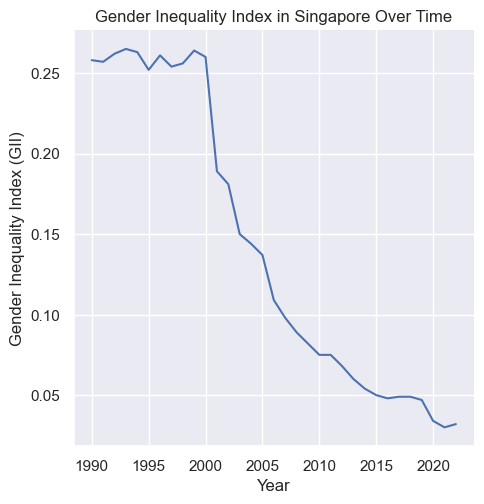

Caption: This line plot depicts the trend of the Gender Inequality Index (GII) in Singapore from 1990 to 2023.
Alt text: A line plot with Year on the x-axis and Gender Inequality Index GII on the y-axis, showing a decreasing trend over time.



In [23]:
singapore_gii = gii[gii["country"] == "Singapore"]

lineplot(singapore_gii, x="year", y="GII", 
        title="Gender Inequality Index in Singapore Over Time",
        xlabel="Year", ylabel="Gender Inequality Index (GII)",
        caption="This line plot depicts the trend of the Gender Inequality Index (GII) in Singapore from 1990 to 2023.",
        alt_text="A line plot with Year on the x-axis and Gender Inequality Index GII on the y-axis, showing a decreasing trend over time."
)

The variables in this plot are Gender Inequality Index (GII) on the y-axis over time in years on the x-axis. While looking at the data, I thought Singapore's GII trend was very interesting because it was a little above 0.25 for the first 10 years of data and then between the years 2000 and 2001, the GII drastically drops. I wonder what happened in 2000 that caused such a large fall in the GII. The GII rapidly decreased most years after and is very low relative to other countries in 2023.

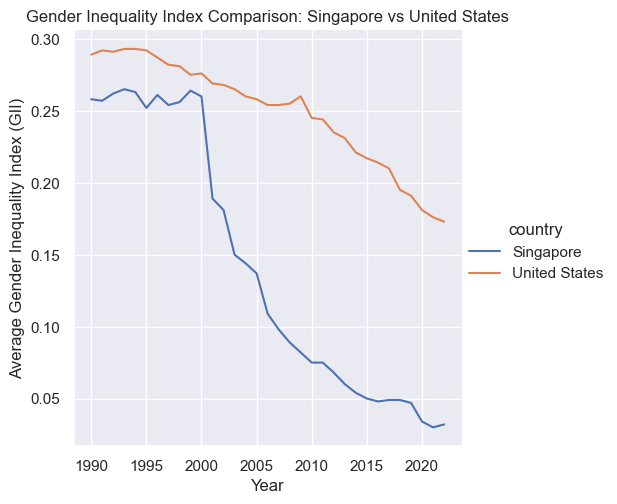

Caption: This line plot compares the average Gender Inequality Index (GII) between Singapore and the United States.
Alt text: A line plot with Year on the x-axis and Average Gender Inequality Index GII on the y-axis, showing Singapore has a lower GII than the United States.



In [24]:
usa_sgp_gii = gii[(gii["country"] == "Singapore") | (gii["country"] == "United States")]
lineplot(usa_sgp_gii, x="year", y="GII", hue="country",
        title="Gender Inequality Index Comparison: Singapore vs United States",
        xlabel="Year", ylabel="Average Gender Inequality Index (GII)",
        caption="This line plot compares the average Gender Inequality Index (GII) between Singapore and the United States.",
        alt_text="A line plot with Year on the x-axis and Average Gender Inequality Index GII on the y-axis, showing Singapore has a lower GII than the United States."
        )

This graph shows the Gender Inequality Index trends for the US and Singapore. The variables represented in the plot are the Year on the x-axis and the Average Gender Inequality Index (0-1 scale with higher numbers being worse) on the y-axis with there being separate lines for the US and Singapore. Both countries have a downward trend, but Singapore has had a consistenty lower GII. It's interesting to note that Singapore had a lower GII that the US by less than 0.05 in 1990 but in 2023 the disparity was greater with Singapore having a GII around 0.15 lower than the US.

## WHO Sanitation 

In [25]:
who_sanitation = pd.read_csv("who_sanitation.csv")
who_sanitation

,ISO3,Country,Residence Type,Service Type,Year,Coverage,Population,Service level
0,ABW,Aruba,total,Sanitation,2000,97.97310,8.696191e+04,At least basic
1,ABW,Aruba,total,Sanitation,2001,98.01251,8.851020e+04,At least basic
2,ABW,Aruba,total,Sanitation,2002,98.05191,8.959886e+04,At least basic
3,ABW,Aruba,total,Sanitation,2003,98.09132,9.054809e+04,At least basic
4,ABW,Aruba,total,Sanitation,2004,98.13072,9.147059e+04,At least basic
...,...,...,...,...,...,...,...,...
25941,ZWE,Zimbabwe,total,Sanitation,2020,18.26108,2.835378e+06,Unimproved
25942,ZWE,Zimbabwe,total,Sanitation,2021,19.06387,3.011560e+06,Unimproved
25943,ZWE,Zimbabwe,total,Sanitation,2022,19.95838,3.207123e+06,Unimproved
25944,ZWE,Zimbabwe,total,Sanitation,2023,20.81385,3.401154e+06,Unimproved


### Rows and Columns

In [26]:
who_sanitation.shape

(25946, 8)

The above code shows that the dataset contains 25946 rows and 8 columns. Each row represents a country in a specific year from 2000 to 2024 (although many countries do not have data for some years) and the corresponding value of the Gender Inequality Index (GII). For example, the first row shows Sanitation data for Aruba in 2000 and the second row shows GII data for Afghanistan in 2021. 

### Missing Data

In [27]:
missing = who_sanitation["Coverage"].isna().sum()
missing

0

There is no missing data in the dataset. This is because the dataset only includes countries which have data for all years. When combining with the WDI dataset, decisions will need to be made to decide what to do about the countries without data.

### Variables of Interest

The WHO/UNESCO Water Supply, Sanitation and Hygiene (WASH) website allow you to choose which indicators, countries, and years you want to focus on and create a dataset with just the information you need. I was able to select only the indicators that were relevant to my research questions across all countries and years. I only selected the Sanitation (At least basic) indicator because this was the only one relevant to my research questions.

1) Sanitation Coverage
* Represents the percentage of househoulds with at least basic sanitation levels for a given country in a given year
* Values range from 0.0 to 100 with a higher number meaning a country has a higher percentage of households with at least basic sanitation
* Useful for RQ1, "How does life expectancy correlate with sanitation?"

In [28]:
who_sanitation = who_sanitation[who_sanitation["Service level"] == "At least basic"]
who_sanitation["Coverage"].describe()

count    1930.000000
mean       76.371415
std        26.748415
min         4.534460
25%        60.160175
50%        89.169810
75%        97.716702
max       100.000000
Name: Coverage, dtype: float64

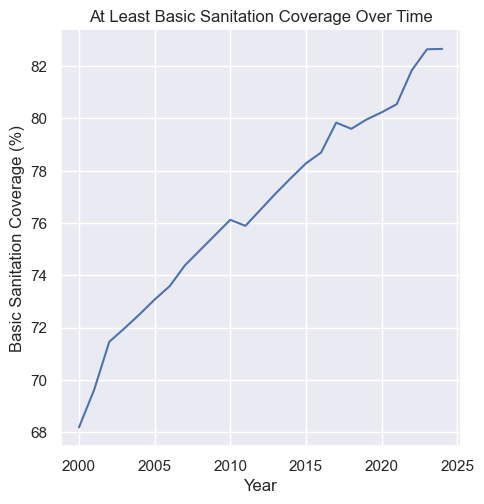

Caption: This line plot depicts the trend of basic sanitation coverage in the world from 2000 to 2024.
Alt text: A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing an increasing trend over time.



In [29]:
world_sanitation = who_sanitation.groupby("Year")["Coverage"].mean().reset_index()

lineplot(world_sanitation, x="Year", y="Coverage", 
        title="At Least Basic Sanitation Coverage Over Time",
        xlabel="Year", ylabel="Basic Sanitation Coverage (%)",
        caption="This line plot depicts the trend of basic sanitation coverage in the world from 2000 to 2024.",
        alt_text="A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing an increasing trend over time."
)

This data plots year on the x-axis and basic sanitation coverage on the y-axis. The trend is increaing at almost a constant rate over time.

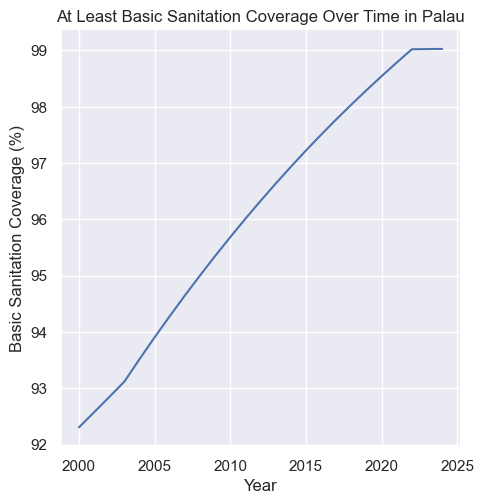

Caption: This line plot depicts the trend of basic sanitation coverage in Palau from 2000 to 2024.
Alt text: A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing a increasing trend over time.



In [30]:
palau_data = who_sanitation[(who_sanitation["Country"] == "Palau")]
lineplot(palau_data, x="Year", y="Coverage", 
        title="At Least Basic Sanitation Coverage Over Time in Palau",
        xlabel="Year", ylabel="Basic Sanitation Coverage (%)",
        caption="This line plot depicts the trend of basic sanitation coverage in Palau from 2000 to 2024.",
        alt_text="A line plot with Year on the x-axis and Basic Sanitation Coverage on the y-axis, showing a increasing trend over time."
)


The line plot plots year on the x-axis and Basic Sanitation Coverage in Palau on the y-axis. The trend is almost linear and increasing, showing that Palau's Sanitation has improved.

## WDI/GII/WHO Sanitation